In [7]:
import matplotlib.pyplot as plt
from q_learning.algorithm import QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from glob import glob
import pandas as pd


In [8]:
import dill


def load(save_path):
        with open(save_path, 'rb') as f:
            return dill.load(f)

In [9]:
plt.rcParams["figure.figsize"] = [20, 12]

In [10]:

from dynamic_programming.policy import DPPolicy

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_aeq-20bits3', 'model_h_c-20bits3']
experiment_id = '*'
experiment_type = 'policy_iteration'
model_files = {model_name: glob(f'tmp/{experiment_type}/{experiment_id}/{model_name}/**/*policy.pkl' ) for model_name in model_names}



Tag: tmp/policy_iteration/711549/model_aeq-20bits3/10/policy
Episode 1 Reward: -708.7871100329533 || New State Found: True


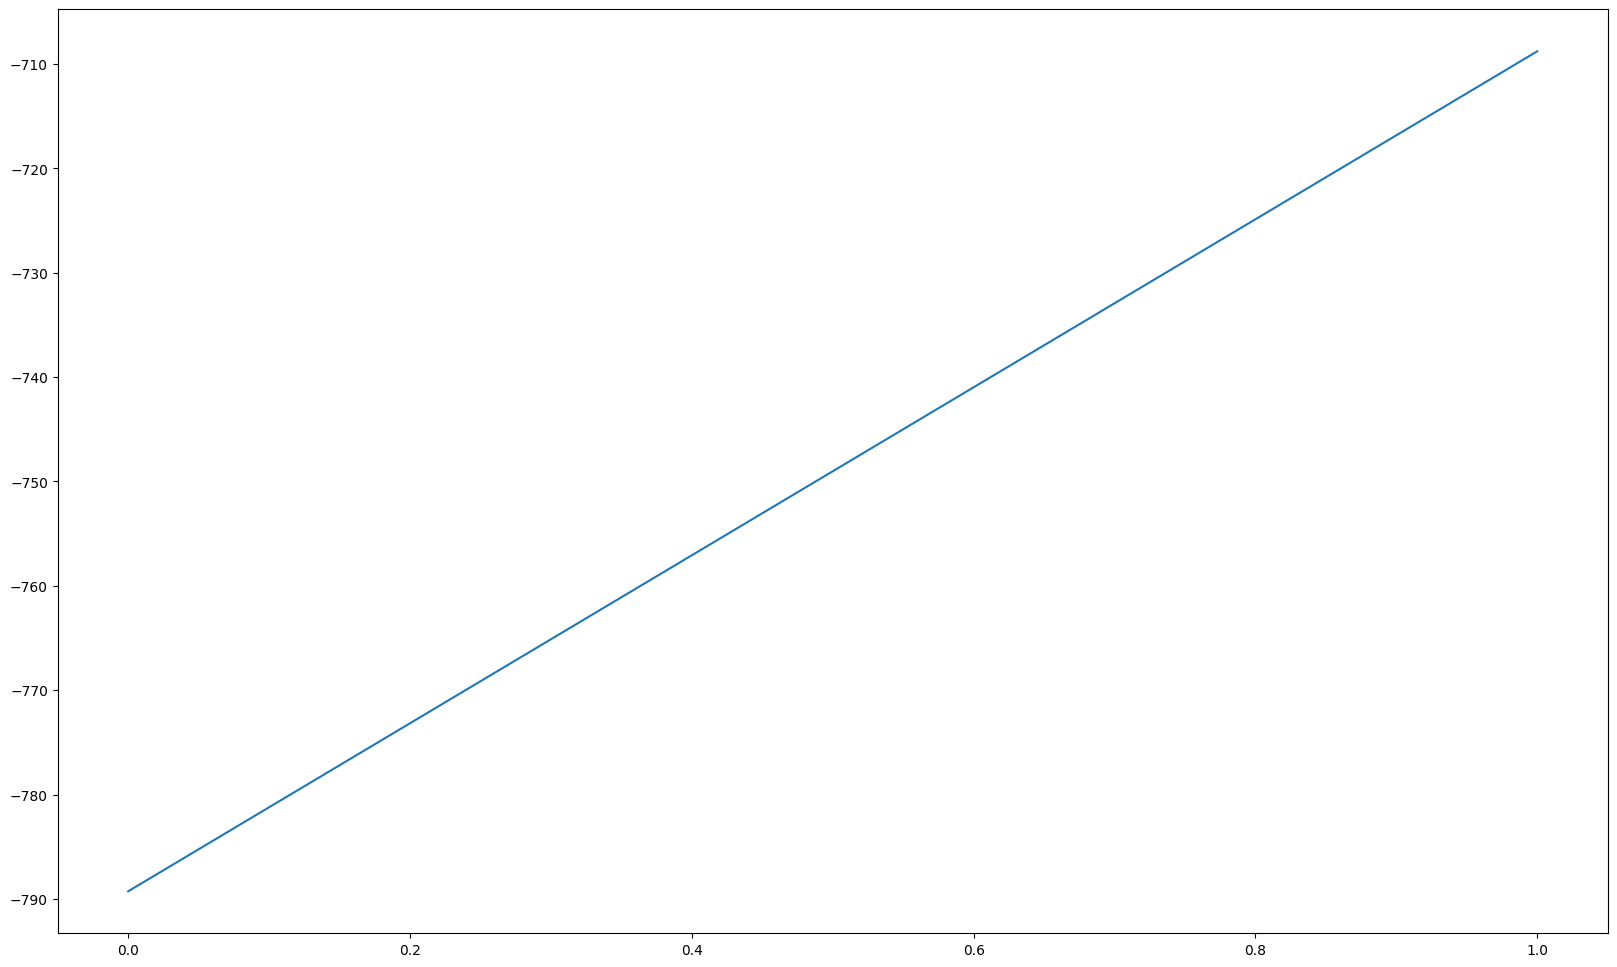

In [ ]:
from benchmarks.policy_benchmarks import PolicyBenchmarks

benchmarks = {}
evaluators = []
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs, tag=policy_file.split('.')[0])
        evaluators.append(evaluator)

policy_benchmarks = PolicyBenchmarks(evaluators=evaluators, epochs=10)
policy_benchmarks.benchmark()

In [ ]:
df = pd.DataFrame(policy_benchmarks.benchmark_metrics)
df.T

In [ ]:
model_files